# PISA Data Exploration

### What is PISA?
PISA is the OECD's Programme for International Student Assessment. Every three years it tests 15-year-old students from all over the world in reading, mathematics and science. The tests are designed to gauge how well the students master key subjects in order to be prepared for real-life situations in the adult world. Why choose 15-year-olds? Because in most countries, at the age of 15, students can decide whether or not they want to continue their education. They therefore need to be equipped for adult life. PISA publishes the results of the test a year after the students are tested to help governments shape their education policy. PISA cycles are referred to by the year in which the students were tested. Therefore PISA 2000 means the students were tested in the year 2000, PISA 2003, in the year 2003 and so forth. More information. (http://www.oecd.org/pisa/)

### Dataset Overview
PISA 2012 data includes various features of investigated students, such as their possessions of certain furniture or their mindset towards learning. I analyzed this data with three different exploration, which are <b>univariate, bivariate and multivariate exploration.</b> In univariate exploration, I took closer look at <b>distribution</b> of students choice shown by <b>countplot.</b> I visualized the distribution of Student-Teacher Relationship and Sense of Belonging. In bivariate exploration, I took closer look at elements that might influence students' <b>score</b> and visualize the relationship between two variables using <b>heatmap.</b> Particulary, I researched if birth month or number of possessions influence score. Finally, in multivariate exploration, I figured out the relationship between two variables according to <b>gender</b> using <b>scatter plot.</b> For example, I visualized relationship between Perceived Control and Perserverance according to gender. 

### Outline
### [1. Preliminary Wrangling](#01)
### [2. Univariate Exploration](#02)
### [3. Bivariate Exploration](#03)
### [4. Multivariate Exploration](#04)

<a id='01'> </a>
## Preliminary Wrangling

This document explores PISA 2012 dataset.

In [1]:
# import all neccessary packages 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
# read the data of PISA 
pisa2012 = pd.read_csv('pisa2012.csv', encoding='latin-1')
pisadict2012 = pd.read_csv('pisadict2012.csv', encoding='latin-1')

c:\users\dudns_pk7j4bd\appdata\local\programs\python\python37\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (15,16,17,21,22,23,24,25,26,30,31,36,37,45,65,123,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,475) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
pisa2012.head()

,Unnamed: 0,CNT,SUBNATIO,STRATUM,OECD,NC,SCHOOLID,STIDSTD,ST01Q01,ST02Q01,...,W_FSTR75,W_FSTR76,W_FSTR77,W_FSTR78,W_FSTR79,W_FSTR80,WVARSTRR,VAR_UNIT,SENWGT_STU,VER_STU
0,1,Albania,80000,ALB0006,Non-OECD,Albania,1,1,10,1.0,...,13.7954,13.9235,13.1249,13.1249,4.3389,13.0829,19,1,0.2098,22NOV13
1,2,Albania,80000,ALB0006,Non-OECD,Albania,1,2,10,1.0,...,13.7954,13.9235,13.1249,13.1249,4.3389,13.0829,19,1,0.2098,22NOV13
2,3,Albania,80000,ALB0006,Non-OECD,Albania,1,3,9,1.0,...,12.7307,12.7307,12.7307,12.7307,4.2436,12.7307,19,1,0.1999,22NOV13
3,4,Albania,80000,ALB0006,Non-OECD,Albania,1,4,9,1.0,...,12.7307,12.7307,12.7307,12.7307,4.2436,12.7307,19,1,0.1999,22NOV13
4,5,Albania,80000,ALB0006,Non-OECD,Albania,1,5,9,1.0,...,12.7307,12.7307,12.7307,12.7307,4.2436,12.7307,19,1,0.1999,22NOV13


In [7]:
pisadict2012.head(20)

,Unnamed: 0,x
0,CNT,Country code 3-character
1,SUBNATIO,Adjudicated sub-region code 7-digit code (3-di...
2,STRATUM,Stratum ID 7-character (cnt + region ID + orig...
3,OECD,OECD country
4,NC,National Centre 6-digit Code
5,SCHOOLID,School ID 7-digit (region ID + stratum ID + 3-...
6,STIDSTD,Student ID
7,ST01Q01,International Grade
8,ST02Q01,National Study Programme
9,ST03Q01,Birth - Month


In [11]:
pisa2012.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 485490 entries, 0 to 485489
Columns: 636 entries, Unnamed: 0 to VER_STU
dtypes: float64(250), int64(18), object(368)
memory usage: 2.3+ GB


In [12]:
pisa2012.shape

(485490, 636)

In [13]:
pisadict2012.shape

(635, 2)

In [14]:
pisa2012.describe()

,Unnamed: 0,SUBNATIO,SCHOOLID,STIDSTD,ST01Q01,ST02Q01,ST03Q01,ST03Q02,ST06Q01,ST115Q01,...,W_FSTR74,W_FSTR75,W_FSTR76,W_FSTR77,W_FSTR78,W_FSTR79,W_FSTR80,WVARSTRR,VAR_UNIT,SENWGT_STU
count,485490.000000,4.854900e+05,485490.000000,485490.000000,485490.000000,485438.000000,485490.000000,485490.000000,457994.000000,479269.000000,...,485490.000000,485490.000000,485490.000000,485490.000000,485490.000000,485490.000000,485490.000000,485490.000000,485490.000000,485490.000000
mean,242745.500000,4.315457e+06,240.152197,6134.066201,9.813323,2.579260,6.558512,1996.070061,6.148963,1.265356,...,50.844201,51.020378,50.943149,50.685275,51.019842,50.540724,50.721164,40.013920,1.531189,0.140054
std,140149.035432,2.524434e+06,278.563016,6733.144944,3.734726,2.694013,3.705244,0.255250,0.970693,0.578992,...,120.684726,122.946533,121.170883,119.267686,122.981541,119.479516,119.799018,22.951264,0.539759,0.137864
min,1.000000,8.000000e+04,1.000000,1.000000,7.000000,1.000000,1.000000,1996.000000,4.000000,1.000000,...,0.292900,0.292900,0.292900,0.292900,0.292900,0.292900,0.292900,1.000000,1.000000,0.000500
25%,121373.250000,2.030000e+06,61.000000,1811.000000,9.000000,1.000000,4.000000,1996.000000,6.000000,1.000000,...,4.660300,4.664800,4.643100,4.667000,4.675200,4.651850,4.660300,20.000000,1.000000,0.037800
50%,242745.500000,4.100000e+06,136.000000,3740.000000,10.000000,1.000000,7.000000,1996.000000,6.000000,1.000000,...,13.637700,13.698900,13.611700,13.672100,13.731100,13.582000,13.600200,40.000000,2.000000,0.145200
75%,364117.750000,6.880000e+06,291.000000,7456.000000,10.000000,3.000000,9.000000,1996.000000,7.000000,1.000000,...,41.233500,41.512500,41.695200,41.097300,41.189600,41.290925,41.356000,60.000000,2.000000,0.199900
max,485490.000000,8.580000e+06,1471.000000,33806.000000,96.000000,25.000000,99.000000,1997.000000,16.000000,4.000000,...,2476.566800,4155.283000,3743.450100,3232.163700,3904.868100,3607.478300,3412.174100,80.000000,3.000000,5.095500


<a id='02'> </a>
## Univariate Exploration
In univariate exploration, I will look at the distribution of single variable and use histogram to visualize the results.
* KEYWORD : Distribution, Countplot

### Q1. How is the student-teacher relation is distributed?

In [3]:
# pick data only related to student-teacher relation 
relation = pisa2012[['ST86Q01', 'ST86Q02', 'ST86Q03', 'ST86Q04', 'ST86Q05']]
relation.head()

,ST86Q01,ST86Q02,ST86Q03,ST86Q04,ST86Q05
0,Agree,Strongly disagree,Agree,Agree,Disagree
1,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN
4,Agree,Agree,Agree,Agree,Agree


In [4]:
# rename the column name according to description
relation.columns = ['Get Along with Teachers', 'Teachers Are Interested', 'Teachers Listen to Students', \
                    'Teachers Help Students', 'Teachers Treat Students Fair']
relation.head()

,Get Along with Teachers,Teachers Are Interested,Teachers Listen to Students,Teachers Help Students,Teachers Treat Students Fair
0,Agree,Strongly disagree,Agree,Agree,Disagree
1,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN
4,Agree,Agree,Agree,Agree,Agree


In [5]:
# drop rows that have missing values 
relation = relation.dropna()
relation.head()

,Get Along with Teachers,Teachers Are Interested,Teachers Listen to Students,Teachers Help Students,Teachers Treat Students Fair
0,Agree,Strongly disagree,Agree,Agree,Disagree
4,Agree,Agree,Agree,Agree,Agree
5,Agree,Strongly agree,Agree,Strongly agree,Agree
6,Strongly agree,Agree,Strongly agree,Agree,Strongly agree
7,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Agree


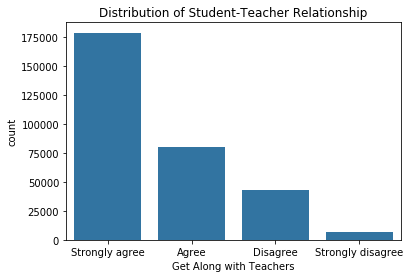

In [6]:
# see distribution of each column by countplot
sb.countplot(x="Get Along with Teachers", data=relation, color = sb.color_palette()[0]);
plt.xticks(np.arange(4),('Strongly agree', 'Agree', 'Disagree', 'Strongly disagree'));
plt.title("Distribution of Student-Teacher Relationship");

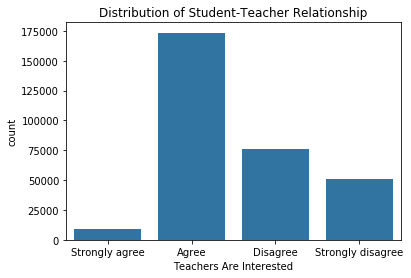

In [7]:
sb.countplot(x="Teachers Are Interested", data=relation, color = sb.color_palette()[0]);
plt.xticks(np.arange(4),('Strongly agree', 'Agree', 'Disagree', 'Strongly disagree'));
plt.title("Distribution of Student-Teacher Relationship");

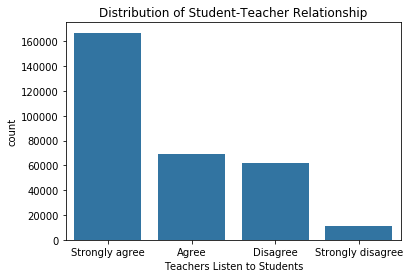

In [143]:
sb.countplot(x="Teachers Listen to Students", data=relation, color = sb.color_palette()[0]);
plt.xticks(np.arange(4),('Strongly agree', 'Agree', 'Disagree', 'Strongly disagree'));
plt.title("Distribution of Student-Teacher Relationship");

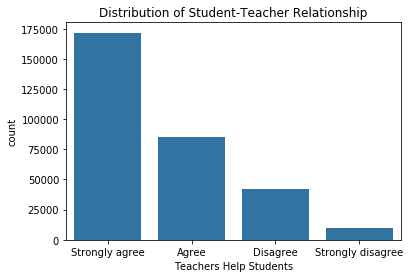

In [144]:
sb.countplot(x="Teachers Help Students", data=relation, color = sb.color_palette()[0]);
plt.xticks(np.arange(4),('Strongly agree', 'Agree', 'Disagree', 'Strongly disagree'));
plt.title("Distribution of Student-Teacher Relationship");

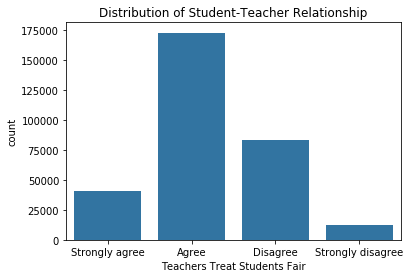

In [145]:
sb.countplot(x="Teachers Treat Students Fair", data=relation, color = sb.color_palette()[0]);
plt.xticks(np.arange(4),('Strongly agree', 'Agree', 'Disagree', 'Strongly disagree'));
plt.title("Distribution of Student-Teacher Relationship");

#### A1. 
Most Student-Teacher Relationship are in descending order, starting from strongly agree to strongly disagree, except two columns. The two columns are 'Teachers Are Interested' and 'Teachers Treat Students Fair'. The former's count on 'Strongly agree' was the least, and the latter's count on 'Strongly agree' was second to the least. Except 'Strongly agree', they are in descending order as well, starting from agree to strongly disagree

### Q2. How is the sense of belonging is distributed?

In [8]:
# pick data only related to sense of belonging 
belonging = pisa2012[['ST87Q01', 'ST87Q02', 'ST87Q03', 'ST87Q04', 'ST87Q05', 'ST87Q06', 'ST87Q07', \
                      'ST87Q08', 'ST87Q09']]

In [9]:
# rename the column name according to description
belonging.columns=['Feel Like Outsider', 'Make Friends Easily', 'Belong at School', 'Feel Awkward at School', \
                   'Liked by Other Students', 'Feel Lonely at School', 'Feel Happy at School', \
                   'Things Are Ideal at School', 'Satisfied at School']
belonging.head()

,Feel Like Outsider,Make Friends Easily,Belong at School,Feel Awkward at School,Liked by Other Students,Feel Lonely at School,Feel Happy at School,Things Are Ideal at School,Satisfied at School
0,Agree,Agree,Strongly disagree,Strongly agree,Strongly agree,Strongly disagree,Agree,Strongly disagree,Agree
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Strongly disagree,Strongly agree,Strongly agree,Strongly disagree,Strongly agree,Strongly disagree,Strongly agree,Strongly agree,Strongly agree


In [10]:
# drop rows that have missing values 
belonging = belonging.dropna()
belonging.head()

,Feel Like Outsider,Make Friends Easily,Belong at School,Feel Awkward at School,Liked by Other Students,Feel Lonely at School,Feel Happy at School,Things Are Ideal at School,Satisfied at School
0,Agree,Agree,Strongly disagree,Strongly agree,Strongly agree,Strongly disagree,Agree,Strongly disagree,Agree
4,Strongly disagree,Strongly agree,Strongly agree,Strongly disagree,Strongly agree,Strongly disagree,Strongly agree,Strongly agree,Strongly agree
5,Disagree,Agree,Agree,Strongly disagree,Agree,Strongly disagree,Agree,Agree,Agree
6,Strongly disagree,Disagree,Agree,Agree,Agree,Strongly disagree,Strongly agree,Strongly agree,Strongly agree
7,Disagree,Agree,Agree,Disagree,Agree,Strongly agree,Agree,Strongly agree,Agree


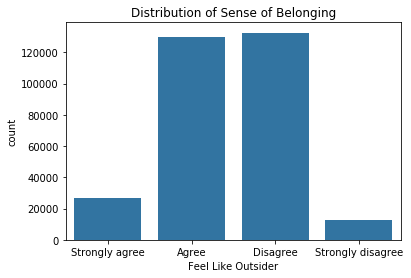

In [11]:
# see distribution of each column by countplot
sb.countplot(x="Feel Like Outsider", data=belonging, color = sb.color_palette()[0]);
plt.xticks(np.arange(4),('Strongly agree', 'Agree', 'Disagree', 'Strongly disagree'));
plt.title("Distribution of Sense of Belonging");

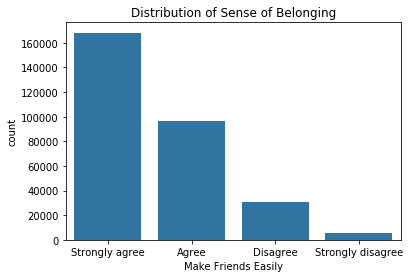

In [12]:
sb.countplot(x="Make Friends Easily", data=belonging, color = sb.color_palette()[0]);
plt.xticks(np.arange(4),('Strongly agree', 'Agree', 'Disagree', 'Strongly disagree'));
plt.title("Distribution of Sense of Belonging");

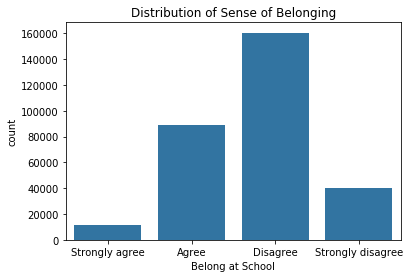

In [146]:
sb.countplot(x="Belong at School", data=belonging, color = sb.color_palette()[0]);
plt.xticks(np.arange(4),('Strongly agree', 'Agree', 'Disagree', 'Strongly disagree'));
plt.title("Distribution of Sense of Belonging");

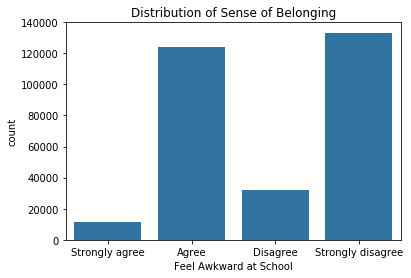

In [153]:
sb.countplot(x="Feel Awkward at School", data=belonging, color = sb.color_palette()[0]);
plt.xticks(np.arange(4),('Strongly agree', 'Agree', 'Disagree', 'Strongly disagree'));
plt.title("Distribution of Sense of Belonging");

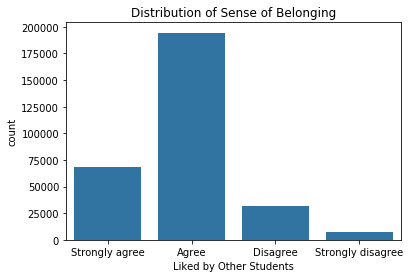

In [148]:
sb.countplot(x="Liked by Other Students", data=belonging, color = sb.color_palette()[0]);
plt.xticks(np.arange(4),('Strongly agree', 'Agree', 'Disagree', 'Strongly disagree'));
plt.title("Distribution of Sense of Belonging");

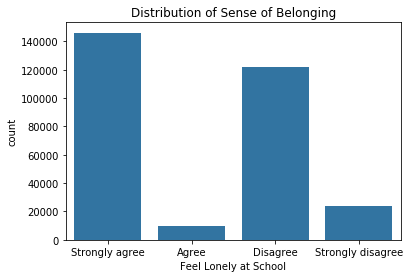

In [149]:
sb.countplot(x="Feel Lonely at School", data=belonging, color = sb.color_palette()[0]);
plt.xticks(np.arange(4),('Strongly agree', 'Agree', 'Disagree', 'Strongly disagree'));
plt.title("Distribution of Sense of Belonging");

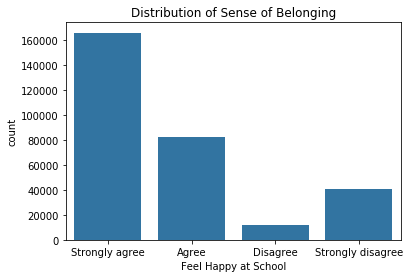

In [150]:
sb.countplot(x="Feel Happy at School", data=belonging, color = sb.color_palette()[0]);
plt.xticks(np.arange(4),('Strongly agree', 'Agree', 'Disagree', 'Strongly disagree'));
plt.title("Distribution of Sense of Belonging");

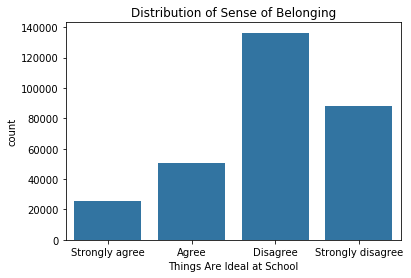

In [151]:
sb.countplot(x="Things Are Ideal at School", data=belonging, color = sb.color_palette()[0]);
plt.xticks(np.arange(4),('Strongly agree', 'Agree', 'Disagree', 'Strongly disagree'));
plt.title("Distribution of Sense of Belonging");

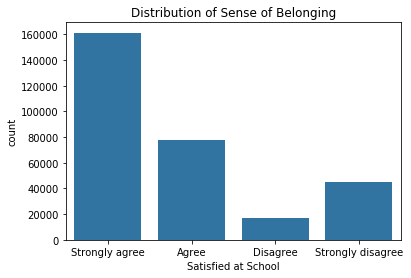

In [152]:
sb.countplot(x="Satisfied at School", data=belonging, color = sb.color_palette()[0]);
plt.xticks(np.arange(4),('Strongly agree', 'Agree', 'Disagree', 'Strongly disagree'));
plt.title("Distribution of Sense of Belonging");

#### A2. 
Most students choose 'Strongly agree' in 'Satisfied at School', 'Feel Happy at School',  'Feel Lonely at School', and 'Make Friends Easily'.
Only in the column 'Liked by Other Students' choose students 'Agree' the most.
In 'Feel Like Outsider', 'Belong at School', 'Things Are Ideal at School', most students picked 'Disagree'.
And finally, most students 'strongly disagreed' in 'Feel Awkward at School'.

<a id='03'> </a>
## Bivariate Exploration
In bivariate exploration, I will look at the realtionship between two variables and use heatmap to visualize the results.

* KEYWORD : Score, Heat Map

### Q1. How is the birth-month and score is related? Does being borned in earlier month have advantage in terms of score?

In [13]:
# creat new dataframe to store score and birth months information
score_birth = pd.DataFrame()

# calculate each subject's mean score 
score_birth['math'] = (pisa2012['PV1MATH']+pisa2012['PV2MATH']+pisa2012['PV3MATH']+pisa2012['PV4MATH']+\
pisa2012['PV5MATH'])/5
score_birth['reading'] = (pisa2012['PV1READ']+pisa2012['PV2READ']+pisa2012['PV3READ']+pisa2012['PV4READ']+\
                   pisa2012['PV5READ'])/5
score_birth['science'] = (pisa2012['PV1SCIE']+pisa2012['PV2SCIE']+pisa2012['PV3SCIE']+pisa2012['PV4SCIE']+\
                   pisa2012['PV5SCIE'])/5

# calculate total mean of all subjects' score 
score_birth['score'] = (score_birth['math']+score_birth['reading']+score_birth['science'])/3

# get data about birth month of students 
score_birth['birth'] = pisa2012.ST03Q01

In [14]:
score_birth.head()

,math,reading,science,score,birth
0,366.18634,261.01424,371.91348,333.038020,2
1,470.56396,384.68832,478.12382,444.458700,2
2,505.53824,405.18154,486.60946,465.776413,9
3,449.45476,477.46376,453.97240,460.296973,8
4,385.50398,256.01010,367.15778,336.223953,10


In [21]:
# check if there are wrong values 
set(score_birth.birth)

{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 99}

In [23]:
# drop unappropriate values
score_birth = score_birth.query('birth!=99')

In [24]:
# check again
set(score_birth.birth)

{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12}

In [15]:
# drop each subjects' mean score 
score_birth = score_birth.drop(['math', 'reading', 'science'], axis=1)

In [16]:
# drop NaNs 
score_birth = score_birth.dropna()
score_birth.head()

,score,birth
0,333.038020,2
1,444.458700,2
2,465.776413,9
3,460.296973,8
4,336.223953,10


In [61]:
# check the statistics of score by birth month 
score_birth.groupby('birth').describe()['score']

,count,mean,std,min,25%,50%,75%,max
birth,,,,,,,,
1,40172.0,474.561960,96.548909,90.565307,405.605082,473.455010,544.175833,784.021767
2,36958.0,475.291622,96.393171,80.133120,406.500665,474.822990,544.458052,820.856000
3,40236.0,474.501115,96.770654,88.137060,406.087140,474.355733,543.819758,816.552207
4,39859.0,474.954494,96.446733,104.595000,406.352960,474.666487,544.392787,799.464160
5,41623.0,474.613432,96.356597,128.547527,405.753760,474.335267,543.548487,826.592027
6,40064.0,473.647078,96.062016,136.465787,405.416297,473.557623,542.699323,822.674880
7,42106.0,472.313845,95.991647,114.454233,403.746165,472.045877,541.524240,822.846287
8,42696.0,470.226623,95.207930,102.284080,402.152902,469.071870,537.726757,793.434260
9,41474.0,470.992381,95.813644,82.631327,402.500845,470.983110,539.925742,791.790727


In [93]:
# set bins according to min and max values 
bins_x = np.arange(0.5, 12+1, 1)
bins_y = np.arange(77, 827+50, 50)

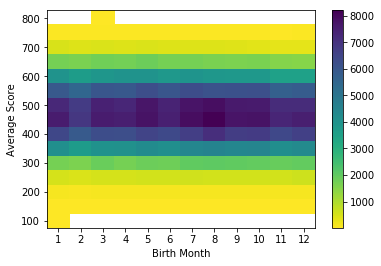

In [98]:
# check the relationship between score and birth month by heatmap 
plt.hist2d(data=score_birth, x='birth', y='score', cmin=10, cmap='viridis_r', bins=[bins_x, bins_y]);
plt.xticks((1,2,3,4,5,6,7,8,9,10,11,12))
plt.colorbar();
plt.xlabel('Birth Month');
plt.ylabel('Average Score');

#### A1. 
There seems no clear relationship between birth month and score.

### Q2. How is the possessions and score is related? Is there any certain possession that acts as a great predictor of high score?

In [100]:
# get data only related to score and possessions 
score_poss = pd.DataFrame()
poss=['ST26Q01', 'ST26Q02', 'ST26Q03', 'ST26Q04', 'ST26Q05', 'ST26Q06', 'ST26Q07', 'ST26Q08', 'ST26Q09'\
     ,'ST26Q10', 'ST26Q11', 'ST26Q12', 'ST26Q13', 'ST26Q14']
score_poss = pisa2012[poss]

In [101]:
# rename the column name according to description
score_poss.columns = ['desk', 'own room', 'study place', 'computer', 'software', 'Internet', 'literature', 'poetry', \
                     'art', 'textbooks', 'technical reference books', 'dictionary', 'dishwasher', 'DVD']

In [102]:
score_poss['score'] = score_birth['score']
score_poss.head()

c:\users\dudns_pk7j4bd\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,desk,own room,study place,computer,software,Internet,literature,poetry,art,textbooks,technical reference books,dictionary,dishwasher,DVD,score
0,Yes,No,Yes,No,No,No,No,Yes,No,Yes,No,Yes,No,Yes,333.038020
1,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,444.458700
2,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,Yes,No,Yes,465.776413
3,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,No,460.296973
4,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,336.223953


In [111]:
# get the number of "Yes" in each row 
poss_num =[]
for _ in range(len(score_poss)):
    poss_num.append((score_poss.iloc[_]=='Yes').sum())

In [112]:
# create new column and store poss_num data 
score_poss['poss_num']=poss_num
score_poss.head()

c:\users\dudns_pk7j4bd\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,desk,own room,study place,computer,software,Internet,literature,poetry,art,textbooks,technical reference books,dictionary,dishwasher,DVD,score,poss_num
0,Yes,No,Yes,No,No,No,No,Yes,No,Yes,No,Yes,No,Yes,333.038020,6
1,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,444.458700,14
2,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,Yes,No,Yes,465.776413,11
3,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,No,460.296973,12
4,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,336.223953,12


In [114]:
score_poss.describe()

,score,poss_num
count,485374.000000,485490.000000
mean,472.503256,9.858059
std,96.038776,3.024273
min,77.114593,0.000000
25%,404.011398,8.000000
50%,472.065883,10.000000
75%,541.475883,12.000000
max,826.592027,14.000000


In [115]:
# set bins according to min and max values 
bins_x = np.arange(0, 14+1, 1)
bins_y = np.arange(77, 827+50, 50)

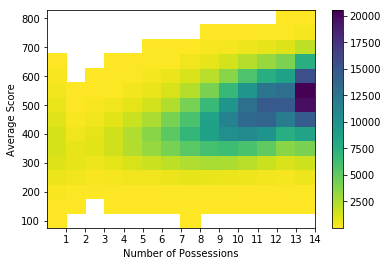

In [117]:
# check the relationship between score and number of possessions by heatmap 
plt.hist2d(data=score_poss, x='poss_num', y='score', cmin=10, cmap='viridis_r', bins=[bins_x, bins_y]);
plt.xticks((1,2,3,4,5,6,7,8,9,10,11,12, 13, 14))
plt.colorbar();
plt.xlabel('Number of Possessions');
plt.ylabel('Average Score');

#### A2. 
As number of possessions growes, so does the average score

<a id='04'> </a>
## Multivariate Exploration
In multivariate exploration, I will look at the relationship between multi variables and use scatter plot to visualize the results. 

* KEYWORD : Gender, Scatter Plot

### Q1. How are gender, perceived control and perseverance related?

In [53]:
# create a new dataframe 
multi1=pd.DataFrame()

In [54]:
# get data about gender
multi1['gender'] = pisa2012.ST04Q01

In [55]:
# list of columns related to perceived control 
control_list = ['Can Succeed with Enough Effort', 'My Choice Whether I Will Be Good', \
               'Could Perform Well if I Wanted']

In [56]:
# get data about perceived control 
multi1[control_list] = pisa2012[['ST91Q01', 'ST91Q02', 'ST91Q05']]

In [57]:
# list of columns related to perserverance
perserv_list=['Remain interested', 'Continue to perfection','Exceed expectations']

In [58]:
# get data about perserverance
multi1[perserv_list] = pisa2012[['ST93Q04', 'ST93Q06', 'ST93Q07']]

In [59]:
multi1.head()

,gender,Can Succeed with Enough Effort,My Choice Whether I Will Be Good,Could Perform Well if I Wanted,Remain interested,Continue to perfection,Exceed expectations
0,Female,Strongly agree,Strongly agree,Disagree,Very much like me,Somewhat like me,Very much like me
1,Female,NaN,NaN,NaN,Mostly like me,Somewhat like me,Very much like me
2,Female,NaN,NaN,NaN,Very much like me,Very much like me,Somewhat like me
3,Female,NaN,NaN,NaN,NaN,NaN,NaN
4,Female,Agree,Strongly agree,Strongly agree,Very much like me,Very much like me,Very much like me


In [60]:
# drop rows that have missing values 
multi1 = multi1.dropna()
multi1.head()

,gender,Can Succeed with Enough Effort,My Choice Whether I Will Be Good,Could Perform Well if I Wanted,Remain interested,Continue to perfection,Exceed expectations
0,Female,Strongly agree,Strongly agree,Disagree,Very much like me,Somewhat like me,Very much like me
4,Female,Agree,Strongly agree,Strongly agree,Very much like me,Very much like me,Very much like me
7,Male,Strongly agree,Agree,Strongly agree,Very much like me,Mostly like me,Somewhat like me
8,Female,Strongly agree,Strongly agree,Strongly agree,Somewhat like me,Somewhat like me,Somewhat like me
12,Female,Strongly agree,Strongly agree,Strongly agree,Mostly like me,Very much like me,Very much like me


In [61]:
# quantify categorical data
multi1[control_list]=multi1[control_list].replace('Strongly agree', 3)
multi1[control_list]=multi1[control_list].replace('Agree', 2)
multi1[control_list]=multi1[control_list].replace('Disagree', 1)
multi1[control_list]=multi1[control_list].replace('Strongly disagree', 0)

In [62]:
multi1.head()

,gender,Can Succeed with Enough Effort,My Choice Whether I Will Be Good,Could Perform Well if I Wanted,Remain interested,Continue to perfection,Exceed expectations
0,Female,3,3,1,Very much like me,Somewhat like me,Very much like me
4,Female,2,3,3,Very much like me,Very much like me,Very much like me
7,Male,3,2,3,Very much like me,Mostly like me,Somewhat like me
8,Female,3,3,3,Somewhat like me,Somewhat like me,Somewhat like me
12,Female,3,3,3,Mostly like me,Very much like me,Very much like me


In [63]:
# quantify categorical data
multi1[perserv_list] = multi1[perserv_list].replace('Very much like me', 4)
multi1[perserv_list] = multi1[perserv_list].replace('Mostly like me', 3)
multi1[perserv_list] = multi1[perserv_list].replace('Somewhat like me', 2)
multi1[perserv_list] = multi1[perserv_list].replace('Not much like me', 1)
multi1[perserv_list] = multi1[perserv_list].replace('Not at all like me', 0)

In [64]:
multi1.head()

,gender,Can Succeed with Enough Effort,My Choice Whether I Will Be Good,Could Perform Well if I Wanted,Remain interested,Continue to perfection,Exceed expectations
0,Female,3,3,1,4,2,4
4,Female,2,3,3,4,4,4
7,Male,3,2,3,4,3,2
8,Female,3,3,3,2,2,2
12,Female,3,3,3,3,4,4


In [65]:
multi1.describe()

,Can Succeed with Enough Effort,My Choice Whether I Will Be Good,Could Perform Well if I Wanted,Remain interested,Continue to perfection,Exceed expectations
count,151413.000000,151413.000000,151413.000000,151413.000000,151413.000000,151413.000000
mean,2.532893,2.254760,2.318473,2.546234,2.455674,2.294559
std,0.583182,0.751731,0.700905,1.068382,1.141698,1.162146
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000
50%,3.000000,2.000000,2.000000,3.000000,3.000000,2.000000
75%,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
max,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000


In [67]:
# get the score of perceived control in each row 
total_control=[]
for _ in range(len(multi1)):
    total_control.append(multi1.iloc[_][control_list].sum())

In [68]:
# get the score of perserverance in each row 
total_perserv=[]
for _ in range(len(multi1)):
    total_perserv.append(multi1.iloc[_][perserv_list].sum())

In [69]:
# create new column and store the total score data 
multi1['total_control']=total_control
multi1['total_perserv']=total_perserv

In [70]:
multi1.head()

,gender,Can Succeed with Enough Effort,My Choice Whether I Will Be Good,Could Perform Well if I Wanted,Remain interested,Continue to perfection,Exceed expectations,total_control,total_perserv
0,Female,3,3,1,4,2,4,7,10
4,Female,2,3,3,4,4,4,8,12
7,Male,3,2,3,4,3,2,8,9
8,Female,3,3,3,2,2,2,9,6
12,Female,3,3,3,3,4,4,9,11


In [79]:
# random subset of 200 students to reduce overplotting
np.random.seed(2019)
sample = np.random.choice(multi1.shape[0], 200, replace=False)
multi1_subset = multi1.loc[sample]

c:\users\dudns_pk7j4bd\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  This is separate from the ipykernel package so we can avoid doing imports until


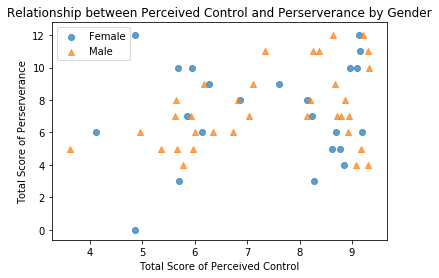

In [80]:
# combine students with horizontal jitter 
ttype_markers = [['Female', 'o'], ['Male', '^']]
for ttype, marker in ttype_markers:
    plot_data = multi1_subset.loc[multi1_subset['gender'] ==ttype]
    sb.regplot(data=plot_data, x='total_control', y='total_perserv', fit_reg=False, x_jitter=0.4, marker=marker,\
              scatter_kws={'alpha':0.7});

plt.xlabel('Total Score of Perceived Control')
plt.ylabel('Total Score of Perserverance');
plt.legend(['Female', 'Male']);
plt.title('Relationship between Perceived Control and Perserverance by Gender');

#### A1.
There seems a little correlation between Perceive Control and Perserverance in case of Male students. The least three score of Perserverance all come from female students, but the highest perserverance score is also from female students. Students give higher score on Perceived Control than Perserverance.

### Q2. How are gender, math work ethic and truancy related?

In [81]:
# create new dataframe
multi2=pd.DataFrame()

In [82]:
# get the gender data 
multi2['gender'] = pisa2012.ST04Q01

In [83]:
# list of columns related to math work ethic 
ethic_list = ['Homework Completed in Time', 'Work Hard on Homework', 'Prepared for Exams',\
             'Study Hard for Quizzes', 'Study Until I Understand Everything', 'Pay Attention in Classes',\
             'Listen in Classes', 'Avoid Distractions When Studying', 'Keep Work Organized']

In [84]:
# get the data about math work ethic 
multi2[ethic_list] = pisa2012[['ST46Q01', 'ST46Q02', 'ST46Q03', 'ST46Q04', 'ST46Q05', 'ST46Q06', 'ST46Q07',\
                 'ST46Q08', 'ST46Q09']]

In [85]:
# list of columns related to truancy
truancy_list=['Late for School', 'Skip whole school day', 'Skip classes within school day']

In [86]:
# get the data about truancy
multi2[truancy_list] =pisa2012[['ST08Q01', 'ST09Q01', 'ST115Q01']]

In [87]:
multi2.head()

,gender,Homework Completed in Time,Work Hard on Homework,Prepared for Exams,Study Hard for Quizzes,Study Until I Understand Everything,Pay Attention in Classes,Listen in Classes,Avoid Distractions When Studying,Keep Work Organized,Late for School,Skip whole school day,Skip classes within school day
0,Female,Agree,Agree,Agree,Agree,Agree,Agree,Agree,Agree,Agree,None,None,1.0
1,Female,Agree,Agree,Strongly agree,Strongly agree,Strongly agree,Agree,Agree,Disagree,Agree,One or two times,None,1.0
2,Female,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Agree,Strongly agree,Strongly agree,Strongly agree,None,None,1.0
3,Female,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,1.0
4,Female,Strongly agree,Strongly agree,Agree,Strongly agree,Strongly agree,Agree,Strongly agree,Strongly agree,Strongly agree,One or two times,None,2.0


In [88]:
# drop rows that have missing values
multi2=multi2.dropna()

In [89]:
# quantify categorical data 
multi2[ethic_list]=multi2[ethic_list].replace('Strongly agree', 3)
multi2[ethic_list]=multi2[ethic_list].replace('Agree', 2)
multi2[ethic_list]=multi2[ethic_list].replace('Disagree', 1)
multi2[ethic_list]=multi2[ethic_list].replace('Strongly disagree', 0)

In [90]:
# check the values of column
set(multi2['Late for School'])

{'Five or more times  ',
 'None  ',
 'One or two times  ',
 'Three or four times  '}

In [107]:
# quantify categorical data 
multi2[['Late for School','Skip whole school day']]=multi2[['Late for School','Skip whole school day']].replace('None  ', 0)
multi2[['Late for School','Skip whole school day']]=multi2[['Late for School','Skip whole school day']].replace('One or two times  ', 2)
multi2[['Late for School','Skip whole school day']]=multi2[['Late for School','Skip whole school day']].replace('Three or four times  ', 4)
multi2[['Late for School','Skip whole school day']]=multi2[['Late for School','Skip whole school day']].replace('Five or more times  ', 6)

In [109]:
# change float data into int 
multi2[truancy_list]=multi2[truancy_list].astype('int')

In [110]:
multi2[truancy_list].head()

,Late for School,Skip whole school day,Skip classes within school day
0,0,0,1
1,1,0,1
2,0,0,1
4,1,0,2
7,0,0,1


In [94]:
# get the score of math work ethic in each row 
total_ethic=[]
for _ in range(len(multi2)):
    total_ethic.append(multi2.iloc[_][ethic_list].sum())

In [111]:
# get the score of truancy in each row 
total_truancy=[]
for _ in range(len(multi2)):
    total_truancy.append(multi2.iloc[_][truancy_list].sum())

In [112]:
# create new column and store the total score data 
multi2['total_ethic']=total_ethic
multi2['total_truancy']=total_truancy

In [113]:
multi2.head()

,gender,Homework Completed in Time,Work Hard on Homework,Prepared for Exams,Study Hard for Quizzes,Study Until I Understand Everything,Pay Attention in Classes,Listen in Classes,Avoid Distractions When Studying,Keep Work Organized,Late for School,Skip whole school day,Skip classes within school day,total_ethic,total_truancy
0,Female,2,2,2,2,2,2,2,2,2,0,0,1,18,1
1,Female,2,2,3,3,3,2,2,1,2,1,0,1,20,2
2,Female,3,3,3,3,3,2,3,3,3,0,0,1,26,1
4,Female,3,3,2,3,3,2,3,3,3,1,0,2,25,3
7,Male,2,3,3,2,3,2,3,3,3,0,0,1,24,1


In [114]:
# random subset of 200 students to reduce overplotting
np.random.seed(2019)
sample = np.random.choice(multi2.shape[0], 200, replace=False)
multi2_subset = multi2.loc[sample]

c:\users\dudns_pk7j4bd\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  after removing the cwd from sys.path.


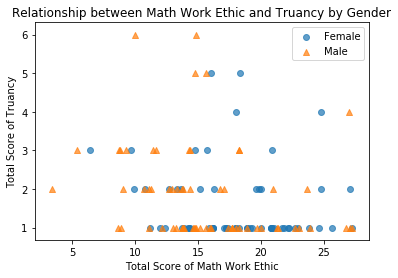

In [115]:
# combine students with horizontal jitter 
ttype_markers = [['Female', 'o'], ['Male', '^']]
for ttype, marker in ttype_markers:
    plot_data = multi2_subset.loc[multi2_subset['gender'] ==ttype]
    sb.regplot(data=plot_data, x='total_ethic', y='total_truancy', fit_reg=False, x_jitter=0.4, marker=marker,\
              scatter_kws={'alpha':0.7});

plt.xlabel('Total Score of Math Work Ethic')
plt.ylabel('Total Score of Truancy');
plt.legend(['Female', 'Male']);
plt.title('Relationship between Math Work Ethic and Truancy by Gender');

#### A2. 
Most students have low Turancy score, especially who get higher than 10 in Math Work Ethic. The two highest Turancy score come from Male students. 